# Project Guideline

GROUP 21
NAMA ANGGOTA KELOMPOK :
1. Dessi Putri Mardanah_11124449_1KA33
2. Falah Akbar Muliawan_10123417_2KA31
3. Nezsya Zifarah Pratama_11124056_1KA33
4. Ravica Maharani Damayanti_11124181_1KA33
5. Siti Fadillah Rahmayani_11124310_1KA29

## Data Understanding

Menjelajahi struktur dan karakteristik dari sebuah data.

Menulis kode untuk mengkoneksikan notebook ke Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Memasukkan library yang akan kamu gunakan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
sns.set(style="whitegrid")
plt.style.use("ggplot")

Mengambil file .csv dari Google Drive kamu.

In [ ]:
import pandas as pd
data_url = '/content/drive/MyDrive/fikti-learning-2025/student_project/projects/group 21/Dataset/housing_data.csv'
df = pd.read_csv(data_url)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Cleaning

Menangani nilai yang hilang, outlier, dan mempersiapkan variabel.

CEK MISSING VALUE

In [ ]:
print("📌 Jumlah missing values sebelum dibersihkan:")
print(df.isnull().sum())

📌 Jumlah missing values sebelum dibersihkan:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


HAPUS BARIS YANG MEMILIKI NILAI KOSONG

In [ ]:
df_clean = df.dropna()
print("\n✅ Setelah menghapus missing values:")
print(df_clean.isnull().sum())
print(f"Jumlah data tersisa: {len(df_clean)}")


✅ Setelah menghapus missing values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
Jumlah data tersisa: 545


DETEKSI OUTLINER PADA KOLOM 'PRICE' MENGGUNAKAN IQR

In [ ]:
Q1 = df_clean['price'].quantile(0.25)
Q3 = df_clean['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\n🔍 Rentang IQR: {lower_bound:.2f} - {upper_bound:.2f}")
print("Menghapus data yang berada di luar rentang ini...")

# Hapus data outlier
df_clean = df_clean[(df_clean['price'] >= lower_bound) & (df_clean['price'] <= upper_bound)]

print(f"✅ Jumlah data setelah menghapus outlier: {len(df_clean)}")


🔍 Rentang IQR: -35000.00 - 9205000.00
Menghapus data yang berada di luar rentang ini...
✅ Jumlah data setelah menghapus outlier: 530


TAMBAHKAN KOLOM LOG_PRICE (TARGET)

In [ ]:
df_clean['log_price'] = np.log(df_clean['price'])

PILIH FITUR DAN TARGET

In [ ]:
features = ['bedrooms', 'bathrooms', 'area', 'parking']
X = df_clean[features]
y = df_clean['log_price']

CEK HASIL AKHIR

In [ ]:
print("\n✅ Data akhir untuk pemodelan:")
print("Fitur (X):", X.shape)
print("Target (y):", y.shape)


✅ Data akhir untuk pemodelan:
Fitur (X): (530, 4)
Target (y): (530,)


## Exploratory Data Analysis

Memvisualisasikan hubungan, distribusi data, dan lain sebagainya.

DISTRIBUSI HARGA RUMAH

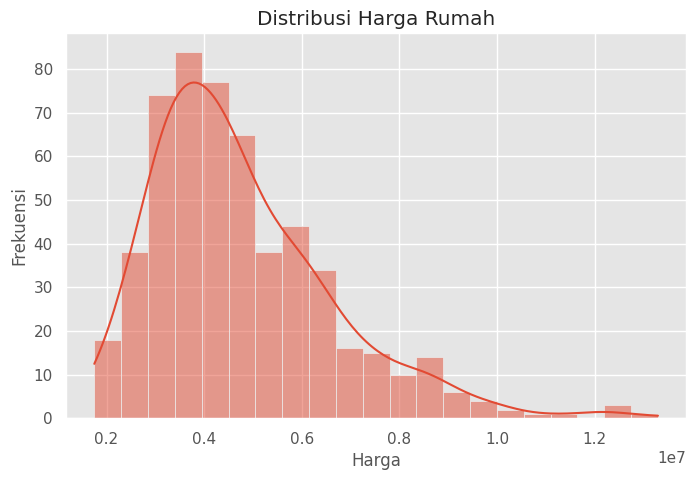

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True)
plt.title('Distribusi Harga Rumah')
plt.xlabel('Harga')
plt.ylabel('Frekuensi')
plt.show()

DISTRIBUSI HARGA DALAM SKALA LOG

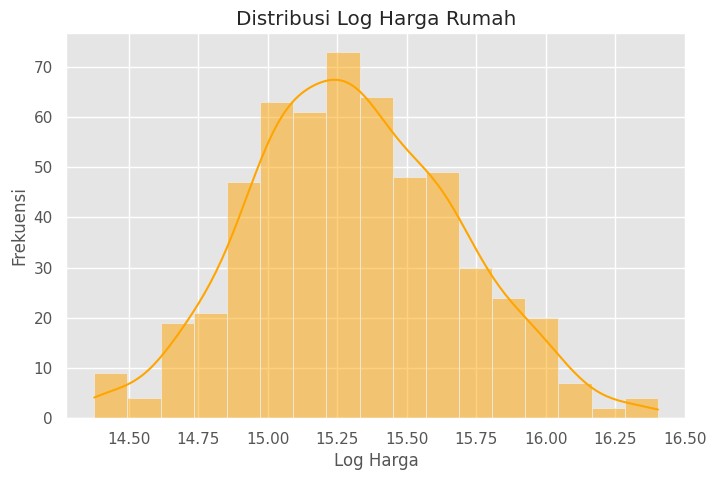

In [ ]:
import numpy as np
df['log_price'] = np.log(df['price'])

plt.figure(figsize=(8, 5))
sns.histplot(df['log_price'], kde=True, color='orange')
plt.title('Distribusi Log Harga Rumah')
plt.xlabel('Log Harga')
plt.ylabel('Frekuensi')
plt.show()

HUBUNGAN ANTARA LUAS AREA DAN HARGA

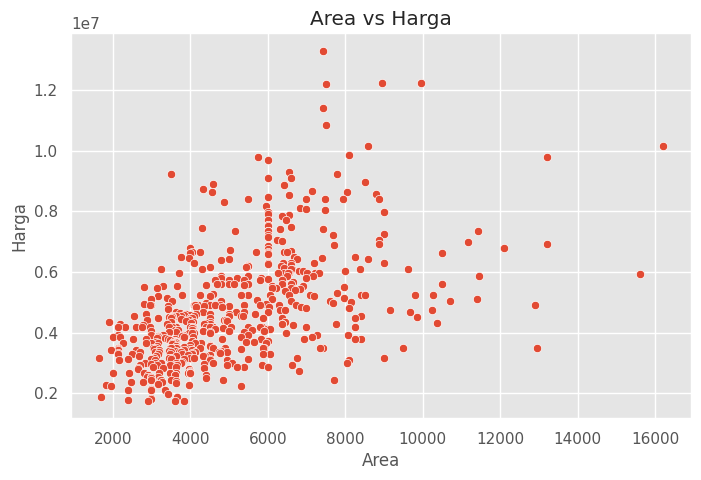

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Area vs Harga')
plt.xlabel('Area')
plt.ylabel('Harga')
plt.show()

BOXPLOT HARGA BERDASARKAN JUMLAH KAMAR TIDUR

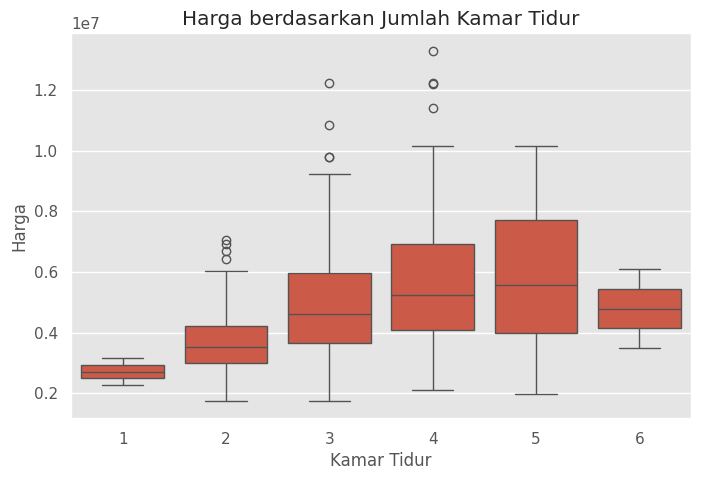

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Harga berdasarkan Jumlah Kamar Tidur')
plt.xlabel('Kamar Tidur')
plt.ylabel('Harga')
plt.show()

HEATMAP KORELASI NUMERIK

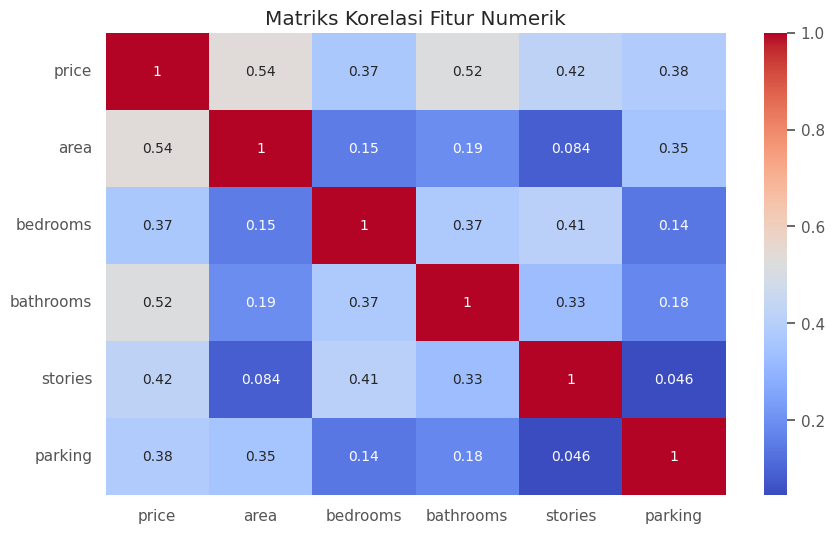

In [ ]:
plt.figure(figsize=(10, 6))
num_cols = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi Fitur Numerik')
plt.show()

VISUALISASI DISTRIBUSI VARIABEL NUMERIK

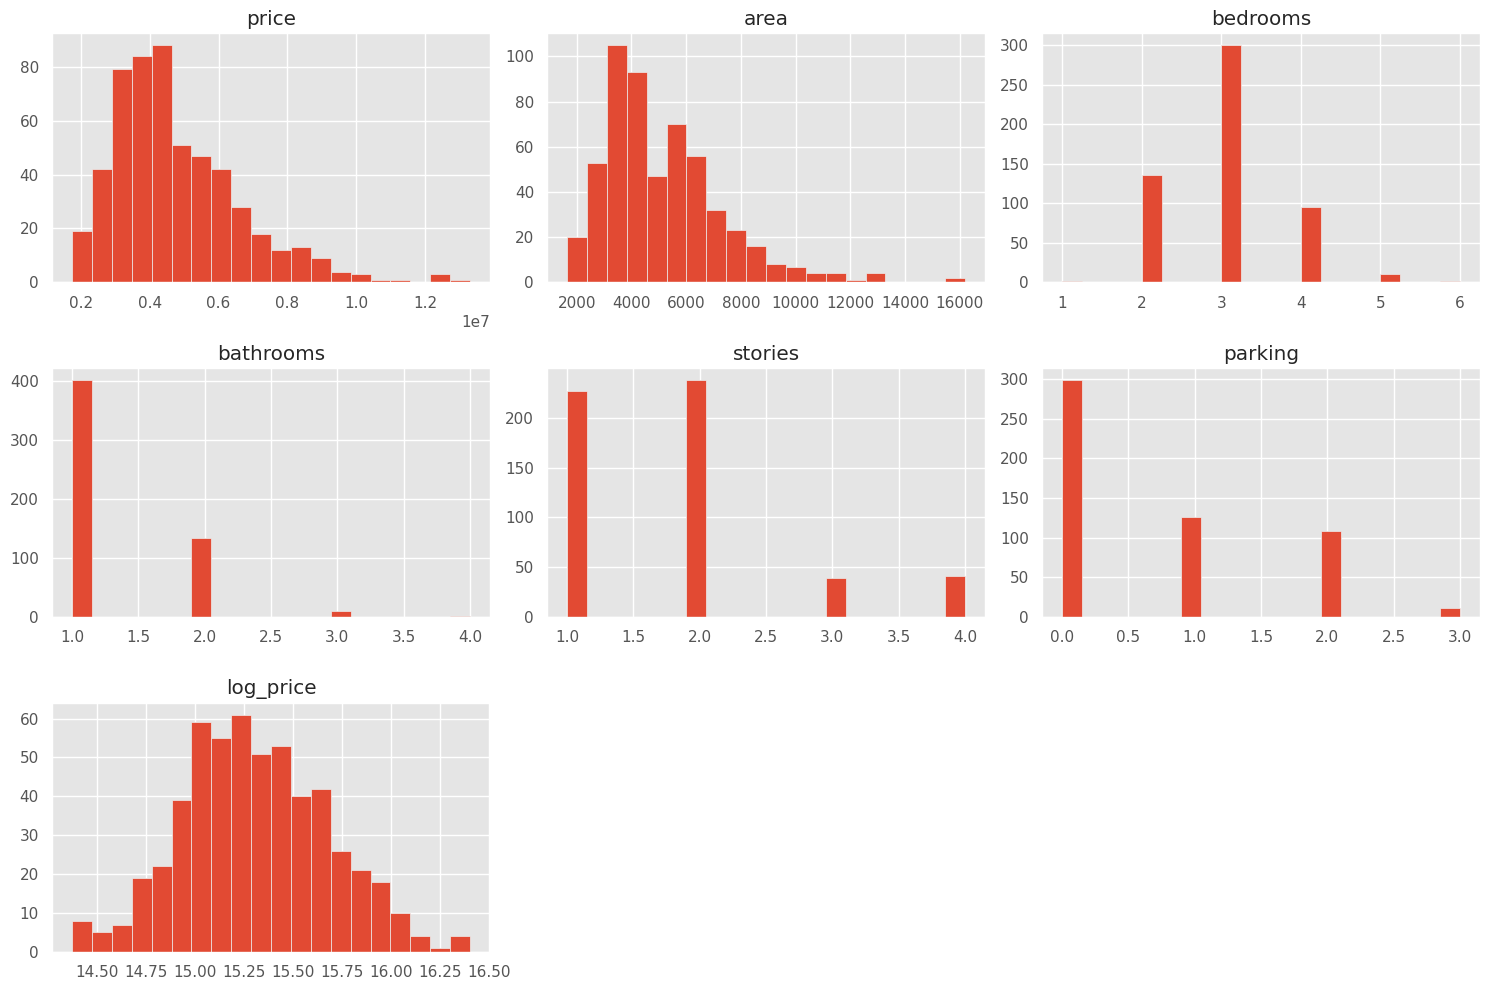

In [ ]:
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

## Data Preparation

Memisahkan data training dan testing

BAGI DATA (TRAIN/TEST SPLIT)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
# Target: log_price (agar distribusi lebih normal)
df['log_price'] = np.log(df['price'])
y = df['log_price']

# Fitur numerik dan kategorikal
numeric_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

In [ ]:
X = df[numeric_features + categorical_features]

# Bagi data 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(drop='first'), categorical_features)
])

## Model Building

Membuat regresi linier pada. Silakan mengeksplorasi dataset kamu terlebih dahulu dengan berbagai kombinasi prediktor.

MODEL DASAR (HANYA FITUR NUMERIK)

In [ ]:
features_1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

MODEL LENGKAP (SEMUA FITUR NUMERIK DAN KATEGORIKAL)

In [ ]:
features_2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
              'mainroad', 'guestroom', 'basement', 'hotwaterheating',
              'airconditioning', 'prefarea', 'furnishingstatus']

MODEL RINGAN (HANYA FITUR SIGNIFIKAN DAN KORELASI)

In [ ]:
features_3 = ['area', 'bathrooms', 'stories', 'airconditioning']

KODE GENERAL UNTUK UJI KOMBINASI

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_model(features):
    X = df[features]
    y = np.log(df['price'])

    # Pisahkan fitur numerik dan kategorikal
    num_features = [f for f in features if df[f].dtype in ['int64', 'float64']]
    cat_features = [f for f in features if df[f].dtype == 'object']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    preprocessor = ColumnTransformer([
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features)
    ])

    model = Pipeline([
        ('preprocess', preprocessor),
        ('regressor', LinearRegression())
    ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        'features': features,
        'R2': r2_score(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred)
    }

CONTOH PEMANGGILAN

In [ ]:
results = []
results.append(evaluate_model(features_1))
results.append(evaluate_model(features_2))
results.append(evaluate_model(features_3))

for res in results:
    print(f"\nModel dengan fitur: {res['features']}")
    print(f"R² Score: {res['R2']:.4f}")
    print(f"MSE: {res['MSE']:.4f}")


Model dengan fitur: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
R² Score: 0.5375
MSE: 0.0893

Model dengan fitur: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
R² Score: 0.6722
MSE: 0.0633

Model dengan fitur: ['area', 'bathrooms', 'stories', 'airconditioning']
R² Score: 0.5470
MSE: 0.0875


## Evaluation

Melakukan evaluasi model yang telah dibuat menggunakan plot dan metrik evaluasi, serta tambahkan interpretasi hasilnya.

METRIK EVALUASI

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Biasanya digunakan untuk membuat array numerik

# --- Tambahkan kode ini untuk mendefinisikan y_test dan y_pred ---
# Contoh data (ganti dengan data Anda yang sebenarnya)
y_test = np.array([3, -0.5, 2, 7])
y_pred = np.array([2.5, 0.0, 2, 8])
# -----------------------------------------------------------------

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.3750
R² Score: 0.9486


VISUALISASI EVALUASI

a. Scatter Plot: Prediksi vs Nilai Sebenarnya

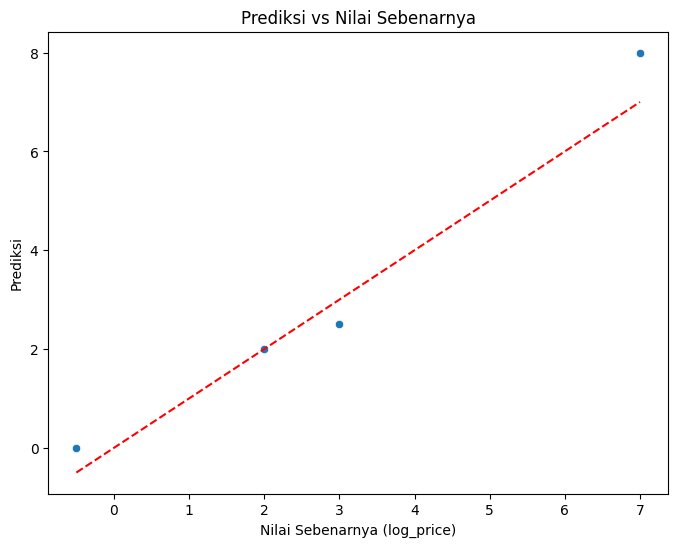

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # garis y=x
plt.xlabel('Nilai Sebenarnya (log_price)')
plt.ylabel('Prediksi')
plt.title('Prediksi vs Nilai Sebenarnya')
plt.show()

b. Residual Plot

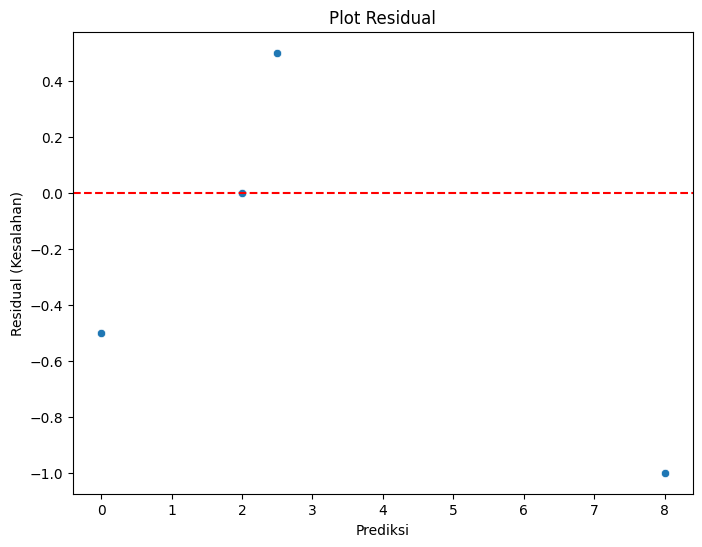

In [8]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Prediksi')
plt.ylabel('Residual (Kesalahan)')
plt.title('Plot Residual')
plt.show()

c. Histogram Residual

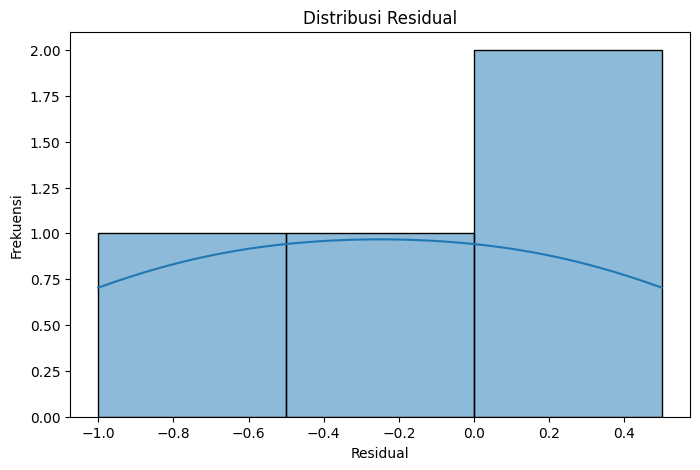

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.title('Distribusi Residual')
plt.xlabel('Residual')
plt.ylabel('Frekuensi')
plt.show()